이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 정규 표현식 튜토리얼 자료입니다.  

링크 : https://wikidocs.net/21703

## **02-05 정규 표현식(Regular Expression)**
---

텍스트 전처리에서 정규 표현식은 아주 유용한 도구입니다. 이번에는 파이썬에서 지원하고 있는 정규 표현식 모듈 re의 사용 방법과 NLTK를 통한 정규 표현식을 이용한 토큰화에 대해서 알아봅니다.

---
### **1. 정규 표현식 문법과 모듈 함수**
---
파이썬에서는 정규 표현식 모듈 re을 지원하므로, 이를 이용하면 특정 규칙이 있는 텍스트 데이터를 빠르게 정제할 수 있습니다. 정규 표현식을 위해 사용되는 특수 문자와 모듈 함수에 대해서 표를 통해 정리해보겠습니다. 표만으로는 이해하기 어렵습니다. 표 아래의 실습과 표를 병행하여 이해하시는 것이 좋습니다.

#### **1) 정규 표현식 문법**
정규 표현식을 위해 사용되는 문법 중 특수 문자들은 아래와 같습니다.

|특수 문자	|설명   |
|---|---|
|`.`	|한 개의 임의의 문자를 나타냅니다. (줄바꿈 문자인 `\n`는 제외)    |
|`?`	|앞의 문자가 존재할 수도 있고, 존재하지 않을 수도 있습니다. (문자가 0개 또는 1개)   |
|`*`	|앞의 문자가 무한개로 존재할 수도 있고, 존재하지 않을 수도 있습니다. (문자가 0개 이상)  |
|`+`	|앞의 문자가 최소 한 개 이상 존재합니다. (문자가 1개 이상)  |
|`^`    |뒤의 문자열로 문자열이 시작됩니다. |
|`$`    |앞의 문자열로 문자열이 끝납니다.   |
|`{숫자}`	|숫자만큼 반복합니다.   |
|`{숫자1, 숫자2}`	|숫자1 이상 숫자2 이하만큼 반복합니다. `?`, `*`, `+`를 이것으로 대체할 수 있습니다.   |
|`{숫자,}`	|숫자 이상만큼 반복합니다.  |
|`[ ]`	|대괄호 안의 문자들 중 한 개의 문자와 매치합니다. [amk]라고 한다면 a 또는 m 또는 k 중 하나라도 존재하면 매치를 의미합니다. `[a-z]`와 같이 범위를 지정할 수도 있습니다. `[a-zA-Z]`는 알파벳 전체를 의미하는 범위이며, 문자열에 알파벳이 존재하면 매치를 의미합니다.  |
|`[^문자]`	|해당 문자를 제외한 문자를 매치합니다.  |
|`\|`	|`A\|B`와 같이 쓰이며 A 또는 B의 의미를 가집니다.  |

정규 표현식 문법에는 역 슬래쉬(\)를 이용하여 자주 쓰이는 문자 규칙들이 있습니다.  
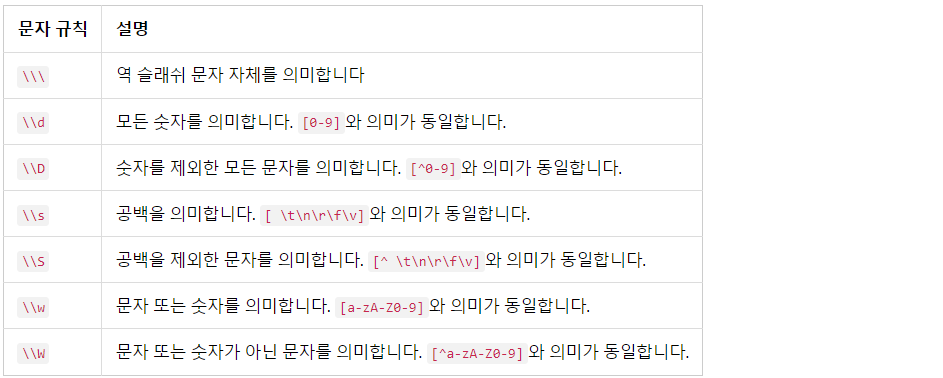

#### **2) 정규표현식 모듈 함수**
정규표현식 모듈에서 지원하는 함수는 이와 같습니다.

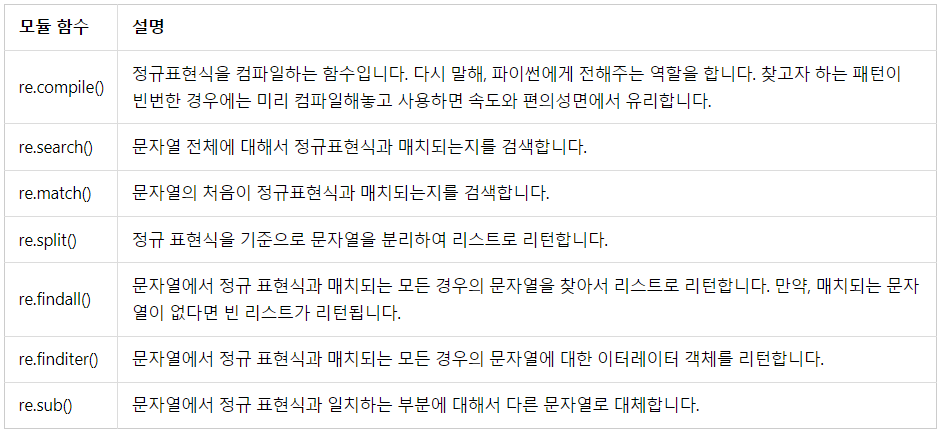

앞으로 진행될 실습에서는 re.compile()에 정규 표현식을 컴파일하고, re.search()를 통해서 해당 정규 표현식이 입력 텍스트와 매치되는지를 확인하면서 각 정규 표현식에 대해서 이해해보겠습니다. re.search()는 매치된다면 Match Object를 리턴하고 매치되지 않으면 아무런 값도 출력되지 않습니다.

---
### **2. 정규 표현식 실습**
---
앞서 표로 봤던 정규 표현식을 예시를 통해 이해해보겠습니다.

In [2]:
import re

#### **1) `.` 기호**
.은 한 개의 임의의 문자를 나타냅니다. 예를 들어서 정규 표현식이 a.c라고 합시다. a와 c 사이에는 어떤 1개의 문자라도 올 수 있습니다. akc, azc, avc, a5c, a!c와 같은 형태는 모두 a.c의 정규 표현식과 매치됩니다.

In [3]:
r = re.compile("a.c")
r.search("kkk") # 아무런 결과도 출력되지 않는다.

In [4]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

`.`은 어떤 문자로도 인식될 수 있기 때문에 abc라는 문자열은 a.c라는 정규 표현식 패턴으로 매치됩니다.

#### **2) `?` 기호**
?는 ?앞의 문자가 존재할 수도 있고 존재하지 않을 수도 있는 경우를 나타냅니다. 예를 들어서 정규 표현식이 ab?c라고 합시다. 이 경우 이 정규 표현식에서의 b는 있다고 취급할 수도 있고, 없다고 취급할 수도 있습니다. 즉, abc와 ac 모두 매치할 수 있습니다.

In [5]:
r = re.compile("ab?c")
r.search("abbc") # 아무런 결과도 출력되지 않는다.

In [6]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

b가 있는 것으로 판단하여 abc를 매치했습니다.

In [7]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

b가 없는 것으로 판단하여 ac를 매치했습니다.

#### **3) `*`기호**
`*`은 바로 앞의 문자가 0개 이상일 경우를 나타냅니다. 앞의 문자는 존재하지 않을 수도 있으며, 또는 여러 개일 수도 있습니다. 정규 표현식이 ab*c라면 ac, abc, abbc, abbbc 등과 매치할 수 있으며 b의 개수는 무수히 많을 수 있습니다.

In [8]:
r = re.compile("ab*c")
r.search("a") # 아무런 결과도 출력되지 않는다.

In [9]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [10]:
r.search("abc") 

<re.Match object; span=(0, 3), match='abc'>

In [11]:
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

#### **4) `+` 기호**
`+`는 `*`와 유사합니다. 다른 점은 앞의 문자가 최소 1개 이상이어야 합니다. 정규 표현식이 ab+c라고 한다면 ac는 매치되지 않습니다. 하지만 abc, abbc, abbbc 등과 매치할 수 있으며 b의 개수는 무수히 많을 수 있습니다.

In [12]:
r = re.compile("ab+c")
r.search("ac") # 아무런 결과도 출력되지 않는다. b가 1개 이상이어야 함

In [13]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [14]:
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

#### **5) `^`기호**
`^`는 시작되는 문자열을 지정합니다. 정규표현식이 ^ab라면 문자열 ab로 시작되는 경우 매치합니다.

In [15]:
r = re.compile("^ab")
r.search("bbc") # 아무런 결과도 출력되지 않는다.
r.search("zab") # 아무런 결과도 출력되지 않는다.

In [16]:
r.search("abz")

<re.Match object; span=(0, 2), match='ab'>

#### **6) {숫자} 기호**
문자에 해당 기호를 붙이면, 해당 문자를 숫자만큼 반복한 것을 나타냅니다. 예를 들어서 정규 표현식이 ab{2}c라면 a와 c 사이에 b가 존재하면서 b가 2개인 문자열에 대해서 매치합니다.

In [17]:
r = re.compile("ab{2}c")
r.search("ac") # 아무런 결과도 출력되지 않는다.
r.search("abc") # 아무런 결과도 출력되지 않는다.
r.search("abbbbbc") # 아무런 결과도 출력되지 않는다.

In [18]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

#### **7) {숫자1, 숫자2} 기호**
문자에 해당 기호를 붙이면, 해당 문자를 숫자1 이상 숫자2 이하만큼 반복합니다. 예를 들어서 정규 표현식이 ab{2,8}c라면 a와 c 사이에 b가 존재하면서 b는 2개 이상 8개 이하인 문자열에 대해서 매치합니다.

In [19]:
r = re.compile("ab{2,8}c")
r.search("ac") # 아무런 결과도 출력되지 않는다.
r.search("abc") # 아무런 결과도 출력되지 않는다.

In [20]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [21]:
r.search("abbbbbbbbc")

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

In [22]:
r.search("abbbbbbbbbc") # 아무런 결과도 출력되지 않는다.

#### **8) {숫자,} 기호**
문자에 해당 기호를 붙이면 해당 문자를 숫자 이상 만큼 반복합니다. 예를 들어서 정규 표현식이 a{2,}bc라면 뒤에 bc가 붙으면서 a의 개수가 2개 이상인 경우인 문자열과 매치합니다. 또한 만약 {0,}을 쓴다면 *와 동일한 의미가 되며, {1,}을 쓴다면 +와 동일한 의미가 됩니다.

In [23]:
r = re.compile("a{2,}bc")
r.search("bc") # 아무런 결과도 출력되지 않는다.
r.search("aa") # 아무런 결과도 출력되지 않는다.
r.search("aaaaaaaabc") # 아무런 결과도 출력되지 않는다.

<re.Match object; span=(0, 10), match='aaaaaaaabc'>

In [24]:
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [25]:
r.search("aaaaaaaabc")

<re.Match object; span=(0, 10), match='aaaaaaaabc'>

#### **9) [   ] 기호**
[    ]안에 문자들을 넣으면 그 문자들 중 한 개의 문자와 매치라는 의미를 가집니다. 예를 들어서 정규 표현식이 [abc]라면, a 또는 b또는 c가 들어가있는 문자열과 매치됩니다. 범위를 지정하는 것도 가능합니다. [a-zA-Z]는 알파벳 전부를 의미하며, [0-9]는 숫자 전부를 의미합니다.

In [26]:
r = re.compile("[abc]") # [abc]는 [a-c]와 같다.
r.search("zzz") # 아무런 결과도 출력되지 않는다.

In [27]:
r.search("a")

<re.Match object; span=(0, 1), match='a'>

In [28]:
r.search("aaaaaaa")      

<re.Match object; span=(0, 1), match='a'>

In [29]:
r.search("baac") 

<re.Match object; span=(0, 1), match='b'>

이번에는 알파벳 소문자에 대해서 범위 지정하여 정규 표현식을 만들어보고 문자열과 매치해보겠습니다.

In [30]:
r = re.compile("[a-z]")
r.search("AAA") # 아무런 결과도 출력되지 않는다.
r.search("111") # 아무런 결과도 출력되지 않는다.

In [31]:
r.search("aBC")

<re.Match object; span=(0, 1), match='a'>

#### **10) [^문자] 기호**
[^문자]는 ^기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치하는 역할을 합니다. 예를 들어서 [^abc]라는 정규 표현식이 있다면, a 또는 b 또는 c가 들어간 문자열을 제외한 모든 문자열을 매치합니다.

In [32]:
r = re.compile("[^abc]")

# 아래의 세 코드는 아무런 결과도 출력되지 않는다.
r.search("a")
r.search("ab") 
r.search("b")

In [33]:
r.search("d")

<re.Match object; span=(0, 1), match='d'>

In [34]:
r.search("1")

<re.Match object; span=(0, 1), match='1'>

---
### **3. 정규 표현식 모듈 함수 예제**
---
앞서 re.compile()과 re.search()를 사용해보았습니다. 다른 정규 표현식 모듈 함수에 대해서 실습을 진행해보겠습니다.


#### **(1) re.match() 와 re.search()의 차이**
search()가 정규 표현식 전체에 대해서 문자열이 매치하는지를 본다면, match()는 문자열의 첫 부분부터 정규 표현식과 매치하는지를 확인합니다. 문자열 중간에 찾을 패턴이 있더라도 match 함수는 문자열의 시작에서 패턴이 일치하지 않으면 찾지 않습니다.

In [35]:
r = re.compile("ab.")
r.match("kkkabc")  #아무런 결과도 출력되지 않는다.

In [36]:
r.search("kkkabc")  

<re.Match object; span=(3, 6), match='abc'>

In [37]:
r.match("abckkk")  

<re.Match object; span=(0, 3), match='abc'>

위 경우 정규 표현식이 ab. 이기때문에, ab 다음에는 어떤 한 글자가 존재할 수 있다는 패턴을 의미합니다. search 모듈 함수에 kkkabc라는 문자열을 넣어 매치되는지 확인한다면 abc라는 문자열에서 매치되어 Match object를 리턴합니다. 하지만 match 모듈 함수의 경우 앞 부분이 ab.와 매치되지 않기때문에, 아무런 결과도 출력되지 않습니다. 하지만 반대로 abckkk로 매치를 시도해보면, 시작 부분에서 패턴과 매치되었기 때문에 정상적으로 Match object를 리턴합니다.

#### **(2) re.split()**
split() 함수는 입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴합니다. 토큰화에 유용하게 쓰일 수 있습니다. 공백을 기준으로 문자열 분리를 수행하고 결과로서 리스트를 리턴해봅시다.

In [38]:
# 공백 기준 분리
text = "사과 딸기 수박 메론 바나나"
re.split(" ", text)

['사과', '딸기', '수박', '메론', '바나나']

이와 유사하게 줄바꿈이나 다른 정규 표현식을 기준으로 텍스트를 분리할 수도 있습니다.

In [39]:
# 줄바꿈 기준 분리
text = """사과
딸기
수박
메론
바나나"""

re.split("\n", text)

['사과', '딸기', '수박', '메론', '바나나']

In [40]:
# '+'를 기준으로 분리
text = "사과+딸기+수박+메론+바나나"

re.split("\+", text)

['사과', '딸기', '수박', '메론', '바나나']

#### **(3) re.findall()**  
findall() 함수는 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴합니다. 단, 매치되는 문자열이 없다면 빈 리스트를 리턴합니다. 임의의 텍스트에 정규 표현식으로 숫자를 의미하는 규칙으로 findall()을 수행하면 전체 텍스트로부터 숫자만 찾아내서 리스트로 리턴합니다.

In [41]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""

re.findall("\d+",text)

['010', '1234', '1234', '30']

하지만 만약 입력 텍스트에 숫자가 없다면 빈 리스트를 리턴하게 됩니다.

In [42]:
re.findall("\d+", "문자열입니다.")

[]

#### **(4) re.sub()**
sub() 함수는 정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체할 수 있습니다. 아래와 같은 정제 작업에 많이 사용되는데, 영어 문장에 각주 등과 같은 이유로 특수 문자가 섞여있는 경우에 특수 문자를 제거하고 싶다면 알파벳 외의 문자는 공백으로 처리하는 등의 용도로 쓸 수 있습니다.

In [43]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub('[^a-zA-Z]', ' ', text)
print(preprocessed_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


---
### **4. 정규 표현식 텍스트 전처리 예제**
---
다음과 같은 임의의 텍스트가 있다고 해봅시다. 테이블 형식의 데이터를 텍스트에 저장하였습니다.

In [44]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""  


`\s+`는 공백을 찾아내는 정규표현식입니다. 뒤에 붙는 `+`는 최소 1개 이상의 패턴을 찾아낸다는 의미입니다. s는 공백을 의미하기 때문에 최소 1개 이상의 공백인 패턴을 찾아냅니다. split은 주어진 정규표현식을 기준으로 분리하므로 결과는 아래와 같습니다.

In [45]:
re.split('\s+', text)

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

공백을 기준으로 값이 구분되었습니다. 해당 입력으로부터 숫자만을 뽑아온다고 해봅시다. 여기서 `\d`는 숫자에 해당되는 정규표현식입니다. `+`를 붙이면 최소 1개 이상의 숫자에 해당하는 값을 의미합니다. findall()은 해당 표현식에 일치하는 값을 찾아냅니다.

In [46]:
re.findall('\d+',text)

['100', '101', '102']

이번에는 텍스트로부터 대문자인 행의 값만 가져와봅시다. 이 경우 정규 표현식에 대문자를 기준으로 매치시키면 됩니다. 하지만 정규 표현식에 대문자라는 기준만을 넣을 경우에는 문자열을 가져오는 것이 아니라 모든 대문자 각각을 갖고오게 됩니다.

In [47]:
re.findall('[A-Z]',text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

대문자가 연속적으로 네 번 등장하는 경우라는 조건을 추가해봅시다.

In [48]:
re.findall('[A-Z]{4}',text)

['PROF', 'STUD', 'STUD']

대문자로 구성된 문자열들을 가져옵니다. 이름의 경우에는 대문자와 소문자가 섞여있는 상황입니다. 이름에 대한 행의 값을 갖고오고 싶다면 처음에 대문자가 등장한 후에 소문자가 여러번 등장하는 경우에 매치하게 합니다.

In [49]:
re.findall('[A-Z][a-z]+',text)

['John', 'James', 'Mac']

---
### **5. 정규 표현식을 이용한 토큰화**
---
NLTK에서는 정규 표현식을 사용해서 단어 토큰화를 수행하는 RegexpTokenizer를 지원합니다. RegexpTokenizer()에서 괄호 안에 하나의 토큰으로 규정하기를 원하는 정규 표현식을 넣어서 토큰화를 수행합니다. tokenizer1에 사용한 `\w+`는 문자 또는 숫자가 1개 이상인 경우를 의미합니다.

tokenizer2에서는 공백을 기준으로 토큰화하도록 했습니다. gaps=true는 해당 정규 표현식을 토큰으로 나누기 위한 기준으로 사용한다는 의미입니다. 만약 `gaps=True`라는 부분을 기재하지 않는다면, 토큰화의 결과는 공백들만 나오게 됩니다. tokenizer2의 결과는 위의 tokenizer1의 결과와는 달리 아포스트로피나 온점을 제외하지 않고 토큰화가 수행된 것을 확인할 수 있습니다.

In [50]:
from nltk.tokenize import RegexpTokenizer

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

# tokenizer1 = RegexpTokenizer("[\w]+")
# tokenizer2 = RegexpTokenizer("[\s]+", gaps=True)
# 정규 표현식에서 원시 문자열 리터럴을 사용하여 오류 해결
tokenizer1 = RegexpTokenizer(r"[\w]+")  # 단어 단위로 토큰화
tokenizer2 = RegexpTokenizer(r"[\s]+", gaps=True)  # 공백을 기준으로 토큰화

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


마지막 편집일시 : 2022년 11월 14일 2:42 오후